In [1]:
# User: Akash

# Index for solutions of the tasks

## Preprocessing Part
- [Task 1 Solution](#t1)
- [Task 2 Solution](#t2)
- [Task 3 Solution](#t3)
- [Task 4 Solution](#t4)
- [Task 5 Solution](#t5)
## EDA Part
- [Why used Median ?](#median) 
- [Task 6 Solution](#t6)
- [Task 7 Solution](#t7)
- [Task 8 Solution](#t8)
- [Task 9 Solution](#t9)
- [Task 12 Solution](#t12)

# Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from geopy.geocoders import Nominatim

# Loading Dataset

In [2]:
carsales = pd.read_csv("carsalesdata.csv")
carsales.head()

,Date,Year,Month,Consumer_Confidence,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,31-01-1980,1980.0,Jan,108.24,27483.57,1558.0,7.0,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,29-02-1980,1980.0,Feb,98.75,24308.68,3048.0,4.0,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,31-03-1980,1980.0,Mar,107.48,28238.44,3137.0,3.0,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,30-04-1980,1980.0,Apr,115.01,32615.15,1653.0,7.0,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,31-05-1980,1980.0,May,98.72,23829.23,1319.0,4.0,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
recession = pd.read_csv("Recession_Data.csv")
recession.head()

,Year,Month
0,1980,Jan
1,1980,Feb
2,1980,Mar
3,1980,Apr
4,1980,May


In [4]:
seasonality = pd.read_csv("Seasonality_Data.csv")
seasonality.head()

,Month,Seasonality_Weight
0,Jan,0.50
1,Feb,0.75
2,Mar,0.20
3,Apr,1.00
4,May,0.20


# Tasks

In [5]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    float64
 2   Month                    528 non-null    object 
 3   Consumer_Confidence      528 non-null    float64
 4   Price                    528 non-null    float64
 5   Advertising_Expenditure  517 non-null    float64
 6   Competition              515 non-null    float64
 7   GDP                      528 non-null    float64
 8   Growth_Rate              528 non-null    float64
 9   unemployment_rate        528 non-null    float64
 10  Automobile_Sales         523 non-null    float64
 11  Vehicle_Type             528 non-null    object 
 12  City                     528 non-null    object 
dtypes: float64(9), object(4)
memory usage: 54.2+ KB


## Converting dtype of Date to datetime

In [6]:
carsales["Date"] = pd.to_datetime(carsales["Date"], format="mixed")

## Task 1 create year and month column <a id='t1'/>

In [7]:
carsales["Date"].dt.year

0      1980.0
1      1980.0
2      1980.0
3      1980.0
4      1980.0
        ...  
527    2023.0
528       NaN
529       NaN
530       NaN
531       NaN
Name: Date, Length: 532, dtype: float64

In [8]:
carsales["Date"].dt.month

0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
       ... 
527    12.0
528     NaN
529     NaN
530     NaN
531     NaN
Name: Date, Length: 532, dtype: float64

`Observation:` Month number and year columns already exists

## Task 2: Checking the count of missing values for each columns <a id='t2'/>

In [9]:
carsales.isna().sum()

Date                        4
Year                        4
Month                       4
Consumer_Confidence         4
Price                       4
Advertising_Expenditure    15
Competition                17
GDP                         4
Growth_Rate                 4
unemployment_rate           4
Automobile_Sales            9
Vehicle_Type                4
City                        4
dtype: int64

`Observation:` The missing values can be handled in numerical columns easily, Since missing columns have numerical data it can be handled.

## Task 3 handling missing values <a id='t3'/>

In [10]:
carsales.dtypes

Date                       datetime64[ns]
Year                              float64
Month                              object
Consumer_Confidence               float64
Price                             float64
Advertising_Expenditure           float64
Competition                       float64
GDP                               float64
Growth_Rate                       float64
unemployment_rate                 float64
Automobile_Sales                  float64
Vehicle_Type                       object
City                               object
dtype: object

### Replacing all missing with their respective means

In [11]:
carsales["Consumer_Confidence"] = carsales["Consumer_Confidence"].fillna(
    carsales["Consumer_Confidence"].mean()
)

In [12]:
carsales.fillna(
    {
        "Price": carsales.Price.mean(),
        "Advertising_Expenditure": carsales["Advertising_Expenditure"].mean(),
        "Competition": carsales.Competition.median(),
        "GDP": carsales.GDP.mean(),
        "Growth_Rate": carsales.Growth_Rate.mean(),
        "unemployment_rate": carsales.unemployment_rate.mean(),
        "Automobile_Sales": carsales.Automobile_Sales.mean(),
    },
    inplace=True,
)

In [13]:
carsales.isna().sum()

Date                       4
Year                       4
Month                      4
Consumer_Confidence        0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               4
City                       4
dtype: int64

`Observation`: Only 4 days data entries are missing from the dataset. So dropped last 4 rows.

In [14]:
carsales = carsales.dropna(subset="Date")
carsales.isna().sum()

Date                       0
Year                       0
Month                      0
Consumer_Confidence        0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

## Task 4: Create a column for a date, recession or not with flag 1 or 0.<a id='t4'/>

In [15]:
mask = (carsales["Year"].isin(recession["Year"])) & (
    carsales["Month"].isin(recession["Month"])
)
carsales["InRecession"] = 0
carsales.loc[mask, "InRecession"] = 1

In [16]:
mask.value_counts()

False    372
True     156
Name: count, dtype: int64

In [17]:
carsales["InRecession"].value_counts()

InRecession
0    372
1    156
Name: count, dtype: int64

## Task 5: Create Seasonality weight using Seasonality Data <a id='t5'/>

In [18]:
df = pd.merge(carsales, seasonality, on="Month")

In [19]:
df.head()

,Date,Year,Month,Consumer_Confidence,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,InRecession,Seasonality_Weight
0,1980-01-31,1980.0,Jan,108.24,27483.57,1558.0,7.0,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,1,0.50
1,1980-02-29,1980.0,Feb,98.75,24308.68,3048.0,4.0,45.986,-0.309594,4.8,555.9,Supperminicar,New York,1,0.75
2,1980-03-31,1980.0,Mar,107.48,28238.44,3137.0,3.0,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,1,0.20
3,1980-04-30,1980.0,Apr,115.01,32615.15,1653.0,7.0,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,1,1.00
4,1980-05-31,1980.0,May,98.72,23829.23,1319.0,4.0,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,1,0.20


## EDA

## Task 6: Line plot showing yearly Automobile sales <a id='t6'>

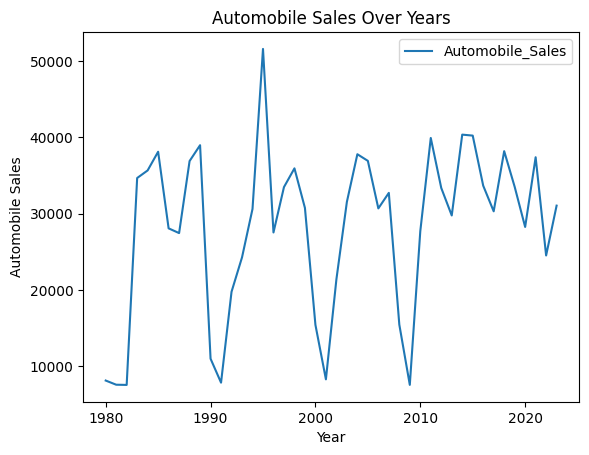

In [20]:
df[["Year", "Automobile_Sales"]].groupby("Year").agg(
    {"Automobile_Sales": "sum"}
).reset_index().plot(x="Year", y="Automobile_Sales", kind="line")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales Over Years");

### Task 7: Line plot for Automobile Sales with respect to Vehicle Type During Recession<a id='t7'>

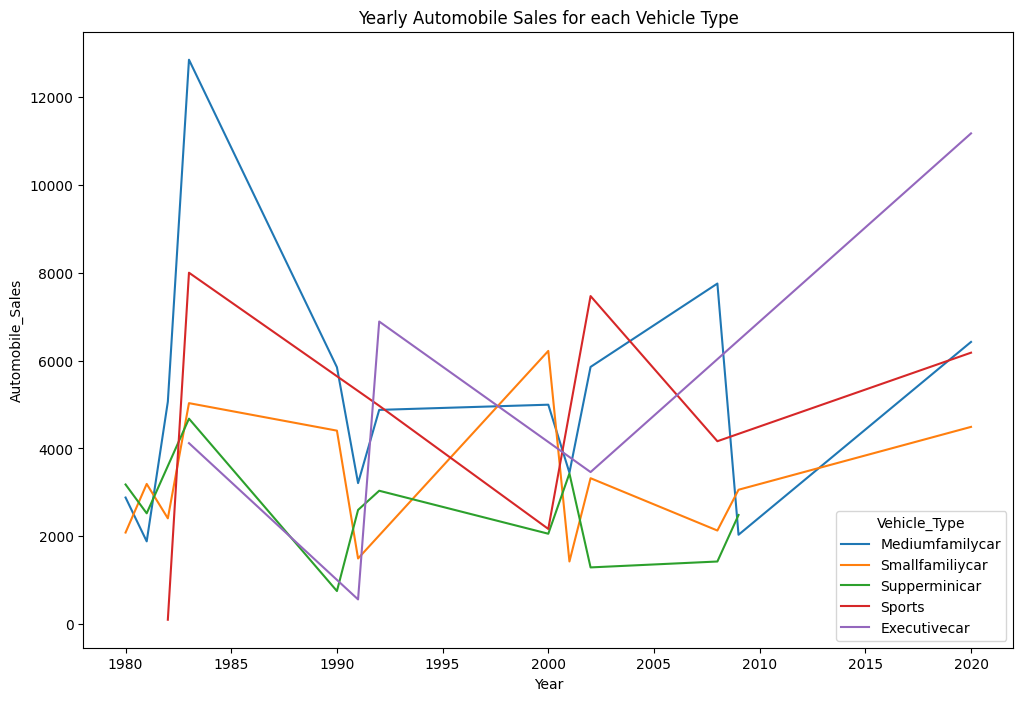

In [22]:
plt.figure(figsize=(12, 8))
s = sns.lineplot(
    df[df["InRecession"] == 1]
    .groupby(["Year", "Vehicle_Type"])
    .agg({"Automobile_Sales": "sum"})
    .reset_index(),
    x="Year",
    y="Automobile_Sales",
    hue="Vehicle_Type",
)
plt.title("Yearly Automobile Sales for each Vehicle Type");

## Task 8: Automobile Sales trends for each Vehicle Type during Recession and Not <a id='t8'/>

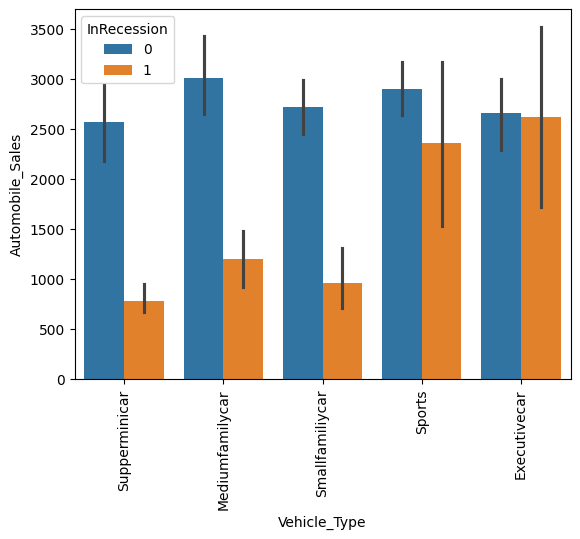

In [23]:
sns.barplot(df, x="Vehicle_Type", y="Automobile_Sales", hue="InRecession")
plt.xticks(rotation=90);

## Task 9: Plot variation in GDP during recession and not <a id='t9'>

## Why Median? <a id='median'/>

- Use  The mean when your data is normally distributed or when you want to consider all values equally.
- Use  The median when your data has extreme values (outliers) or when you want a measure that is more robust to outliers.
- If you want to compare the central tendency of GDP and Automobile_Sales during recession versus non-recession periods while being less influenced by outliers, you might consider plotting the median for GDP and Automobile_Sales instead of the mean.

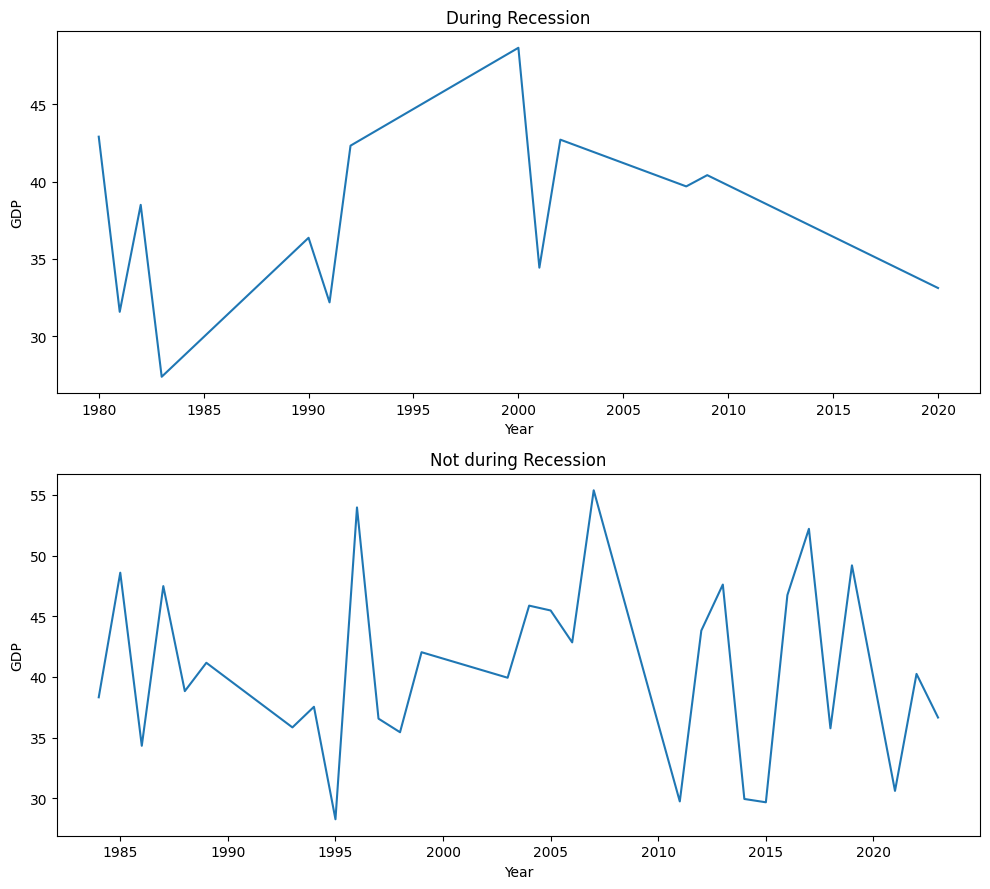

In [24]:
fig, ax = plt.subplots(2, figsize=(10, 9))

in_recession = (
    df[df.InRecession == 1].groupby("Year").agg({"GDP": "median"}).reset_index()
)
not_recession = (
    df[df.InRecession == 0].groupby("Year").agg({"GDP": "median"}).reset_index()
)
ax[0].plot(in_recession.Year, in_recession.GDP)
ax[0].set_title("During Recession")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("GDP")

ax[1].plot(not_recession.Year, not_recession.GDP)
ax[1].set_title("Not during Recession")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP")
plt.tight_layout();

## Task 10: Impact of Seasonality_Weight on Automobile_Sales <a id='t10'>

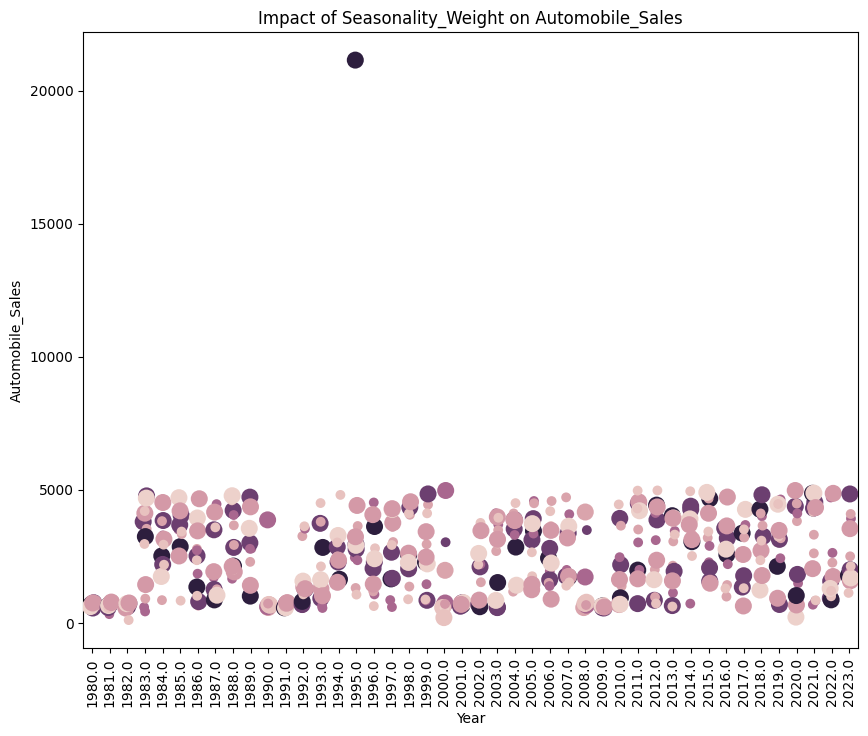

In [25]:
plt.figure(figsize=(10, 8))
sns.stripplot(
    df,
    x="Year",
    y="Automobile_Sales",
    hue="Seasonality_Weight",
    sizes=(50, 150),
    legend=False,
)
plt.title("Impact of Seasonality_Weight on Automobile_Sales")
plt.xticks(rotation=90);

## Task 11 Correlation between price vs sales during recession <a id='t11'> 

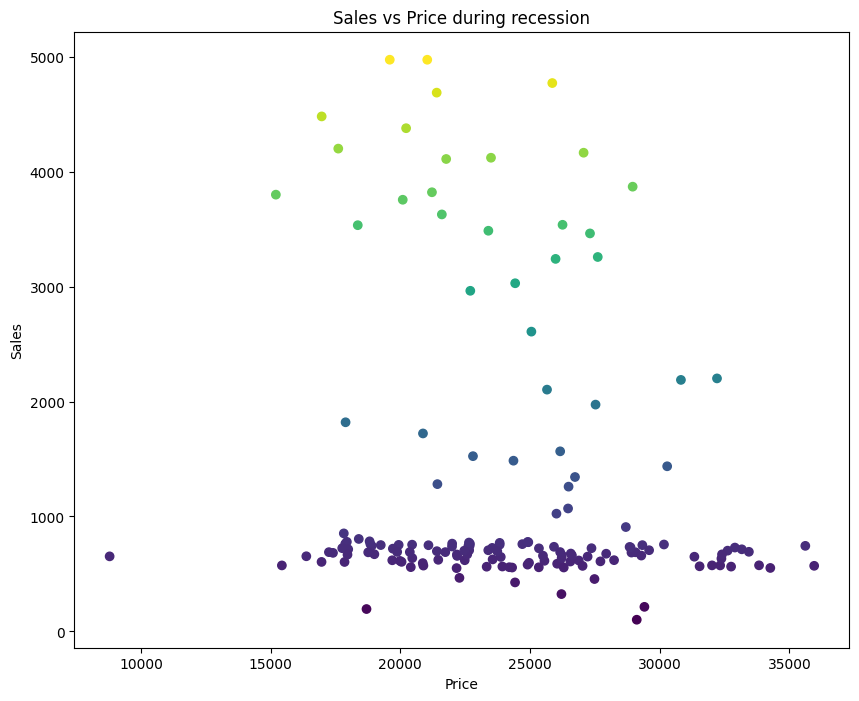

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(
    data=df[df["InRecession"] == 1],
    x="Price",
    y="Automobile_Sales",
    c="Automobile_Sales",
)
plt.title("Sales vs Price during recession")
plt.xlabel("Price")
plt.ylabel("Sales");

## Task 12:  % of Advertising_Expenditure of Sports vehicle of all categories during recession an not  <a id='t12'>

In [27]:
data = pd.merge(
    df.groupby(["InRecession"]).agg({"Advertising_Expenditure": "sum"}).reset_index(),
    df[df["Vehicle_Type"] == "Sports"]
    .groupby(["InRecession"])
    .agg({"Advertising_Expenditure": "sum"})
    .reset_index()
    .rename({"Advertising_Expenditure": "Advertising_Expenditure_sports"}, axis=1),
)
data["Percentage of Ad Expenses"] = (
    data["Advertising_Expenditure_sports"] / data["Advertising_Expenditure"]
) * 100
data

,InRecession,Advertising_Expenditure,Advertising_Expenditure_sports,Percentage of Ad Expenses
0,0,1.148124e+06,258092.473888,22.479496
1,1,4.715115e+05,49421.000000,10.481399


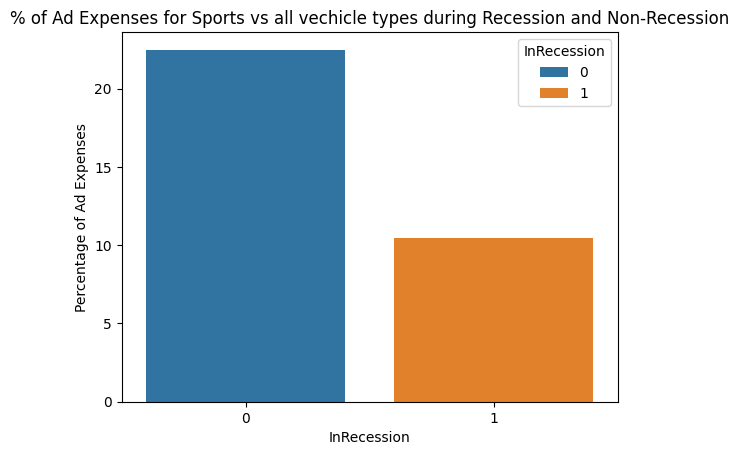

In [28]:
sns.barplot(data, x="InRecession", y="Percentage of Ad Expenses", hue="InRecession")
plt.title(
    "% of Ad Expenses for Sports vs all vechicle types during Recession and Non-Recession"
);

## Task 13: Ad expanditure for each vehicle types during recession  <a id='t13'>

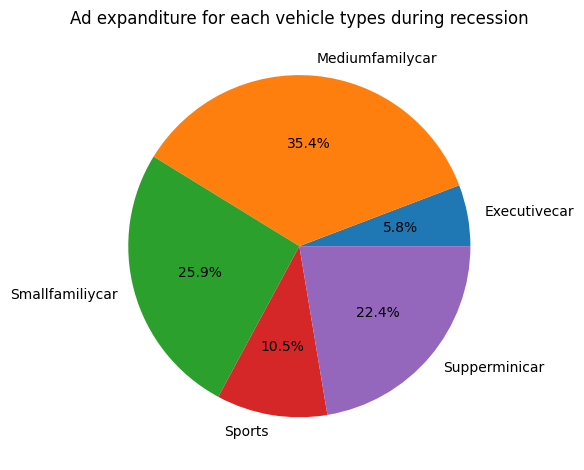

In [29]:
data = (
    df[df["InRecession"] == 1]
    .groupby("Vehicle_Type")
    .agg({"Advertising_Expenditure": "sum"})
    .reset_index()
)
plt.pie(data["Advertising_Expenditure"], labels=data["Vehicle_Type"], autopct="%1.1f%%")
plt.title("Ad expanditure for each vehicle types during recession")
plt.tight_layout();

## Task  14:  Effect of unemployment on vehicles sales for each types during recession <a id='t14'>

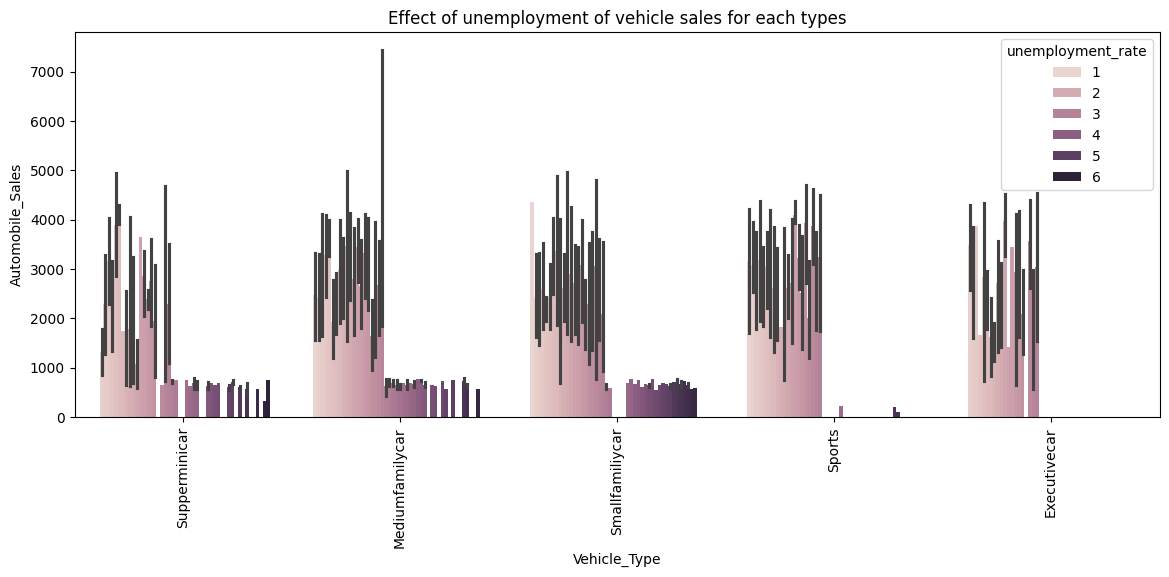

In [30]:
plt.figure(figsize=(14, 5))
plt.title("Effect of unemployment of vehicle sales for each types")
sns.barplot(data=df, x="Vehicle_Type", y="Automobile_Sales", hue="unemployment_rate")
plt.xticks(rotation=90);

## Task 15: City wise average monthly sales during recession and not

In [32]:
avg_sales_per_city = (
    df[df["InRecession"] == 1].groupby("City")["Automobile_Sales"].mean().reset_index()
)
avg_sales_per_city

,City,Automobile_Sales
0,California,1302.708696
1,Georgia,938.908571
2,Illinois,1470.202778
3,New York,1215.220513


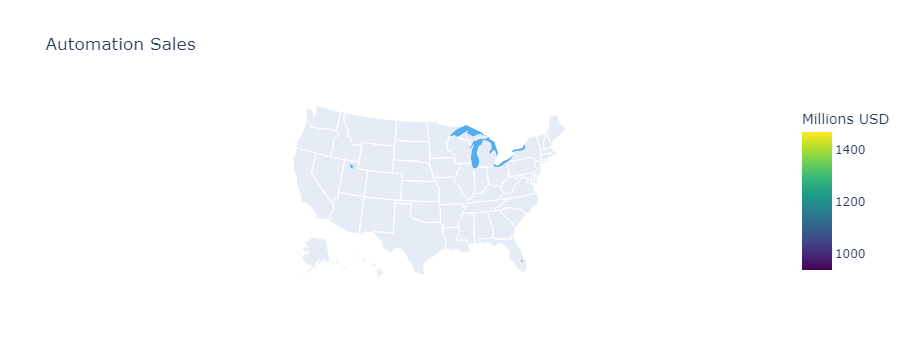

In [47]:
data = dict(
    type="choropleth",
    colorscale="Viridis",  # Changed colorscale to 'Viridis'
    locations=avg_sales_per_city["City"],
    z=avg_sales_per_city["Automobile_Sales"],
    locationmode="USA-states",
    marker=dict(line=dict(color="rgb(255,255,255)", width=2)),
    colorbar={"title": "Millions USD"},
)

layout = dict(
    title="Automation Sales",
    geo=dict(scope="usa", showlakes=True, lakecolor="rgb(85,173,240)"),
)

choromap = go.Figure(data=[data], layout=layout)

# Display the choropleth map
choromap.show()

In [33]:
avg_sales_per_city = (
    df[df["InRecession"] == 0].groupby("City")["Automobile_Sales"].mean().reset_index()
)
avg_sales_per_city

,City,Automobile_Sales
0,California,2633.378313
1,Georgia,2994.846977
2,Illinois,2718.987506
3,New York,2918.710499


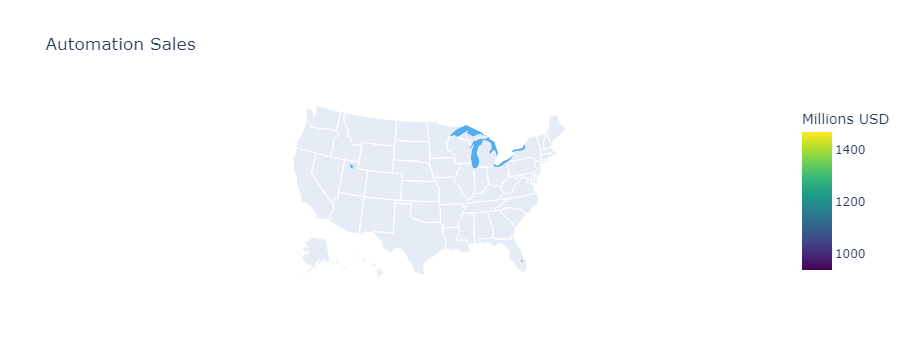

In [48]:
data = dict(
    type="choropleth",
    colorscale="Viridis",  # Changed colorscale to 'Viridis'
    locations=avg_sales_per_city["City"],
    z=avg_sales_per_city["Automobile_Sales"],
    locationmode="USA-states",
    marker=dict(line=dict(color="rgb(255,255,255)", width=2)),
    colorbar={"title": "Millions USD"},
)

layout = dict(
    title="Automation Sales",
    geo=dict(scope="usa", showlakes=True, lakecolor="rgb(85,173,240)"),
)

choromap = go.Figure(data=[data], layout=layout)

# Display the choropleth map
choromap.show()